In [18]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [19]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure([0,1,2],[0,1,2])


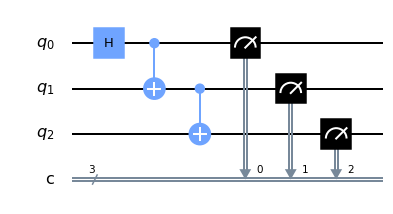

In [20]:
qc.draw('mpl')

In [21]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()

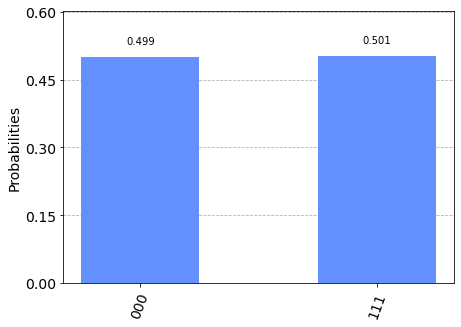

In [22]:
plot_histogram(result.get_counts(qc))

In [14]:
from qiskit import IBMQ
IBMQ.save_account('a9783f33a64e88d038689c3d3a67cb4235d7715268ca95f986cf1e3e514cd601c77d52d8d8cffda397c63ad4f4cd488a6e907452415bf854dd028ae21c78c927')

In [15]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [23]:
job = execute(qc, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

600d54954ae4e518ab331a17
Job Status: job has successfully run


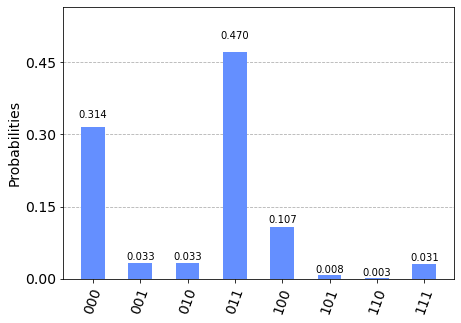

In [24]:
device_result = job.result()
plot_histogram(device_result.get_counts(qc))

In [25]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [26]:
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel = 'measerrormitigationcal')

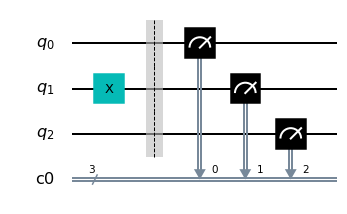

In [27]:
cal_circuits[2].draw('mpl')

In [28]:
len(cal_circuits)

8

In [29]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

600d9e55304f1c47cd1c0dbc
Job Status: job has successfully run


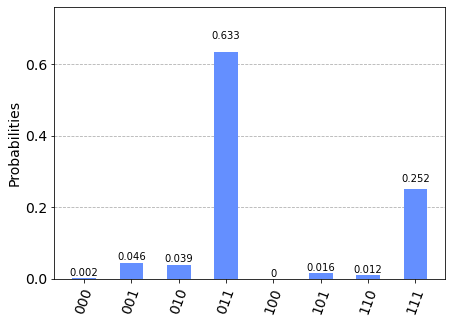

In [30]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [31]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

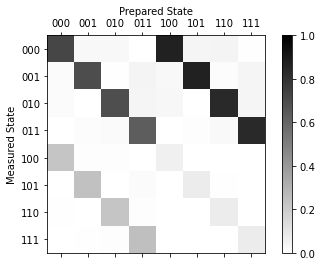

In [32]:
meas_fitter.plot_calibration()

In [33]:
meas_filter = meas_fitter.filter

In [34]:
mitigated_result = meas_filter.apply(device_result)

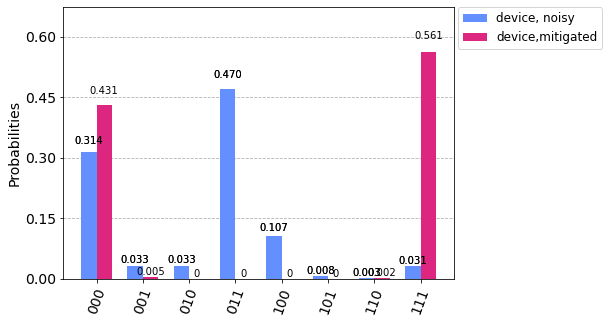

In [36]:
device_counts = device_result.get_counts(qc)
mitigated_counts = mitigated_result.get_counts(qc)
plot_histogram([device_counts,mitigated_counts], legend = ['device, noisy', 'device,mitigated'])

In [42]:
circuit = QuantumCircuit(3,3)
circuit.x(1)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])


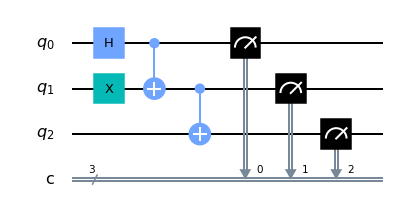

In [43]:
circuit.draw('mpl')

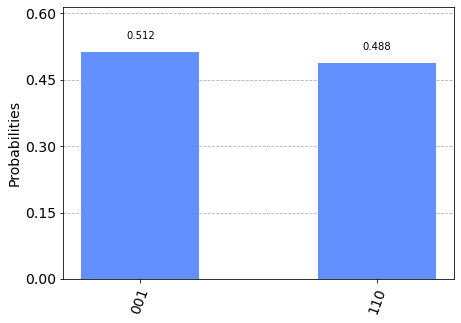

In [44]:
plot_histogram(execute(circuit, backend = simulator, shots = 1024).result().get_counts(circuit))
                       

In [45]:
device_counts_1 = execute(circuit, backend = device,shots = 1024).result().get_counts(circuit)

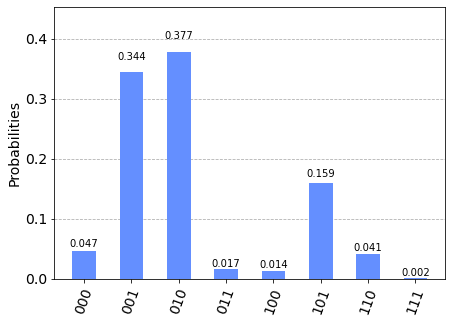

In [46]:
plot_histogram(device_counts_1)

In [47]:
device_mitigated_counts_1 = meas_filter.apply(device_counts_1)

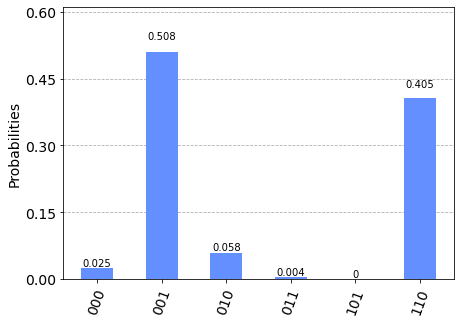

In [48]:
plot_histogram(device_mitigated_counts_1)